<a href="https://colab.research.google.com/github/bork0047/Data-Analysis/blob/main/Big_Data_Coursework_by_me.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CM3111- Big Data Analytics (Coursework)

Name: Borislav Nikolaev Aleksandrov
Student number: 1906490

Description of dataset and peer review:
The dataset I have chosen is about Hepatitis Sickness and probability of it being fatal. The dataset contains instances of patients who suffered hepatitis based on mutual or different characteristics. 
This is a major problem in deprieved areas, mainly third world countries and it is interesting to review the data about it based on each individual person. 
The dataset is from this website: https://archive.ics.uci.edu/ml/datasets/Hepatitis and was downloaded at 13th of november.


This data will be used to predict the survival rate of hepatitis based on certain attributes, which later on could be used to decrease the mortality rate.


Main objective of the coursework: 
To review how many people with what conditions mostly die from the dangerous sickness of hepatitis, based on conditions and information gathered about each individual and their status.
The dataset will be used to build a model to predict the possibility that a hepatitis may be fatal for an individual based on their condition.
The main  main classification method will be logistic regression/classification.



The paper I am going to use is here: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6668288/

Although not a lot of people are sick from hepatitis, it is still one of the most dangerous diseases known to mankind. This is what the paper is mainly about - trying to analyze and save people based on their condition.
In England, an estimated 0.4% (160,000) of the population have chronic hepatitis C virus (HCV) infection, with the main group at risk of HCV infection being persons who inject drugs or steroids. 
Thanks to the paper a conclusion was made: Mortality rates, particularly in younger individuals, were higher in those with a diagnosis of HCV infection compared with the general English population, highlighting health inequalities. 
The high mortality rates are also mostly associated with common co-morbidities, such as problematic drug and alcohol use and anything related to poor or dirty lifestryle and consumption. 

Thanks to this trend monitoring the government was able to identify more precisely the deprieved ares from which more people were taken care of, increasing the equality of the population and identifying and decreasing the deprieved areas.

In [ ]:
# import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from pandas import Series, DataFrame

In [ ]:
#now we load the data 
df = pd.read_csv('hepatitis.csv')
df.head(10)

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver big,liver firm,spleen palpable,spiders,ascites,varices,bilirubin,alk phosphate,sgot,albumin,protime,histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,?,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
3,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1
5,2,34,1,2,2,2,2,2,2,2,2,2,2,2,0.90,95,28,4.0,75,1
6,1,51,1,1,2,1,2,1,2,2,1,1,2,2,?,?,?,?,?,1
7,2,23,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,?,?,?,1
8,2,39,1,2,2,1,2,2,2,1,2,2,2,2,0.70,?,48,4.4,?,1
9,2,30,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,120,3.9,?,1


In [ ]:
#now information about the file itself, i.e. number of collumns and rows
print(f'There are {df.shape[0]} rows and {df.shape[1]} columns in this dataset')

There are 155 rows and 20 columns in this dataset


In [ ]:
# Also checking the names of the columns
df.columns

Index(['class', 'age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise',
       'anorexia', 'liver big', ' liver firm', 'spleen palpable', 'spiders',
       'ascites', 'varices', 'bilirubin', 'alk phosphate', 'sgot', 'albumin',
       'protime', 'histology'],
      dtype='object')

In [ ]:
#checking the data types so I know what I deal with
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   class            155 non-null    int64 
 1   age              155 non-null    int64 
 2   sex              155 non-null    int64 
 3   steroid          155 non-null    object
 4   antivirals       155 non-null    int64 
 5   fatigue          155 non-null    object
 6   malaise          155 non-null    object
 7   anorexia         155 non-null    object
 8   liver big        155 non-null    object
 9    liver firm      155 non-null    object
 10  spleen palpable  155 non-null    object
 11  spiders          155 non-null    object
 12  ascites          155 non-null    object
 13  varices          155 non-null    object
 14  bilirubin        155 non-null    object
 15  alk phosphate    155 non-null    object
 16  sgot             155 non-null    object
 17  albumin          155 non-null    ob

Note: The class attribute features if the certain person is dead or alive, where 1 is for the patient to be dead and 2 is for the patient to be alive.
I will show the values after the for loop

In [ ]:
# here we print out the different types of classes with how many features they have.
# using a simple for loop 
for i in df.columns:
        print(i,len(df[i].unique()))

class 2
age 49
sex 2
steroid 3
antivirals 2
fatigue 3
malaise 3
anorexia 3
liver big 3
 liver firm 3
spleen palpable 3
spiders 3
ascites 3
varices 3
bilirubin 35
alk phosphate 84
sgot 85
albumin 30
protime 45
histology 2


In [ ]:
for i in df.columns:
    #printing the unique values in the column
    if len(df[i].unique())<10:
        print(f'{i} has {len(df[i].unique())} unique values, These are: {df[i].unique()}')

class has 2 unique values, These are: [2 1]
sex has 2 unique values, These are: [2 1]
steroid has 3 unique values, These are: ['1' '2' '?']
antivirals has 2 unique values, These are: [2 1]
fatigue has 3 unique values, These are: ['2' '1' '?']
malaise has 3 unique values, These are: ['2' '1' '?']
anorexia has 3 unique values, These are: ['2' '1' '?']
liver big has 3 unique values, These are: ['1' '2' '?']
 liver firm has 3 unique values, These are: ['2' '1' '?']
spleen palpable has 3 unique values, These are: ['2' '1' '?']
spiders has 3 unique values, These are: ['2' '1' '?']
ascites has 3 unique values, These are: ['2' '1' '?']
varices has 3 unique values, These are: ['2' '?' '1']
histology has 2 unique values, These are: [1 2]


In [ ]:
# number of rows of people in the dataset with age<47
n = df[df.age<=47].shape[0]
# print the percentage of those
print ('Percentage of people under the age of 42 is ', round(n/df.shape[0],2)*100)

Percentage of people under the age of 42 is  69.0


In [ ]:
# similarily for the 50% percentile
# number of rows of people in the dataset with age<55
n = df[df.age<=55].shape[0]
# print the percentage of those
print ('Percentage of people under the age of 49 is ', round(n/df.shape[0],2))

Percentage of people under the age of 49 is  0.86


In [ ]:
df.quantile([.1, .25, .5, .75], axis = 0)

,class,age,sex,antivirals,histology
0.10,1.0,26.4,1.0,1.0,1.0
0.25,2.0,32.0,1.0,2.0,1.0
0.50,2.0,39.0,1.0,2.0,1.0
0.75,2.0,50.0,1.0,2.0,2.0


In [ ]:
df['class'].value_counts()

2    123
1     32
Name: class, dtype: int64

In [ ]:
#here we visualize the previous distribution
sns.set_style('darkgrid')
sns.set_palette('Set2')
# make a copy of the dataset
dfC = df.copy()
# function to change sex values
def changeS(sex):
    if sex == 1:
        return 'Female'
    else:
        return 'Male'
# applying the function to the whole column in the dataset
dfC['sex'] = dfC['sex'].apply(changeS)
# function to change the class
def changeT(label):
    if label == 0:
        return 'Alive from hepatitis'
    else:
        return 'Not alive'
dfC['steroid'] = dfC['steroid'].apply(changeT)

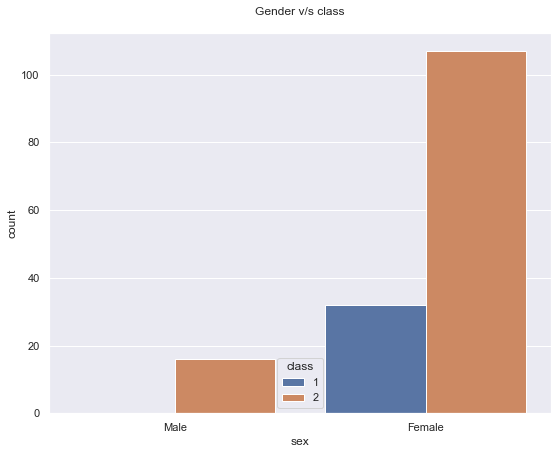

In [ ]:
#from this we could see that so far only male subjects have died from hepatitis without analyzing the other columns
sns.set(rc={'figure.figsize':(9,7)})
sns.countplot(data= dfC, x='sex',hue='class')
plt.title('Gender v/s class\n')
plt.show()

In [ ]:
#here we can print what percentaghttps://en-gb.facebook.com/e of donors have used steroids and what have not. 
#however it only prints 0 as the value
donors_using_steroids = len(df[df.steroid==1])
donors_no_steroids = len(df[df.steroid==2])
print(f'Percentage of Donors who use steroids is {round(donors_using_steroids/df.shape[0]*100,2)}')
print(f'Percentage of Donors who dont use steroids is {round(donors_no_steroids/df.shape[0]*100,2)}')

Percentage of Donors who use steroids is 0.0
Percentage of Donors who dont use steroids is 0.0


In [ ]:
#here we can check which values are missing
df.isnull().sum()

class              0
age                0
sex                0
steroid            0
antivirals         0
fatigue            0
malaise            0
anorexia           0
liver big          0
 liver firm        0
spleen palpable    0
spiders            0
ascites            0
varices            0
bilirubin          0
alk phosphate      0
sgot               0
albumin            0
protime            0
histology          0
dtype: int64

According to these results there are no missing values, however when retrieving the dataset it was pointed as a comment that the missing values were marked with "?", in the place of a cell. Together with that was a table on which column, how many values were missing:
1:11,
2:11,
3:11,
4:11,
5:11,
6:11,
7:11,
8:11,
9:11,
10:11,
11:11,
12:11,
13:11,
14:11,
15:11,
16:11,
17:11,
18:11,
19:11,
20:11

The first value is the attribute number. 

The second number is how many values are missing from the current attribute i.e. how many are marked with "?".

In [ ]:
missing = np.nan

df.isnull()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver big,liver firm,spleen palpable,spiders,ascites,varices,bilirubin,alk phosphate,sgot,albumin,protime,histology
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
151,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
152,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
153,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
#here I replace all the values that are '?' with a Null value which can be identified
df = df.replace(['?'],None)

In [ ]:
df.head(10)

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver big,liver firm,spleen palpable,spiders,ascites,varices,bilirubin,alk phosphate,sgot,albumin,protime,histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,?,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
3,2,31,1,2,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,46,200,4.0,80,1
5,2,34,1,2,2,2,2,2,2,2,2,2,2,2,0.90,95,28,4.0,75,1
6,1,51,1,1,2,1,2,1,2,2,1,1,2,2,0.90,95,28,4.0,75,1
7,2,23,1,2,2,2,2,2,2,2,2,2,2,2,1.00,95,28,4.0,75,1
8,2,39,1,2,2,1,2,2,2,1,2,2,2,2,0.70,95,48,4.4,75,1
9,2,30,1,2,2,2,2,2,2,2,2,2,2,2,1.00,95,120,3.9,75,1


In [ ]:
df['protime'] = df['protime'].replace(['?'],np.nan)
df['protime'] = df['protime'].replace([None],np.nan)
#df.head(10)
df.isnull().sum()

class              0
age                0
sex                0
steroid            0
antivirals         0
fatigue            0
malaise            0
anorexia           0
liver big          0
 liver firm        0
spleen palpable    0
spiders            0
ascites            0
varices            0
bilirubin          0
alk phosphate      0
sgot               0
albumin            0
protime            3
histology          0
dtype: int64

In [ ]:
# Compute the mean for protime
protime_mean = round(df['protime'].mean())
# assign the mean to the missing values
df['protime'].fillna(protime_mean, inplace = True)

After multiple tries every value converts as supposed, and no errors occure, however the first 3 values in the protime row were always '?', which does not seem to be changable.
I made sure to edit it, as I changed the '?' to None and then the None to null values as it made the code run

Now time to create a classification model for the linear regression which will help me to classify/predict the class label in my dataset

In [ ]:
# store the input features
X = df.drop('class', axis = 1)
# store the label column into y variable
y = df['class']

#here I check the type of variables that are x and y
print(type(X))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [ ]:
#Here I make the test set to evaluate the performance of my model
#Below, I use the train_test_split to do this split 80% of the data for training, and 20% of the data for testing

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
#Normalizating data

from sklearn import preprocessing
normalized_X_train = preprocessing.normalize(X_train)
normalized_X_test = preprocessing.normalize(X_test)

In [ ]:
#I use the LogisticRegression from the sklearn library to create the Logistic Regression Model
from sklearn.linear_model import LogisticRegression

lg_model = LogisticRegression(solver='lbfgs',max_iter=3000)
lg_model.fit(X_train,y_train)

LogisticRegression(max_iter=3000)

Now the predictions and error inspection

In [ ]:
# The predicted values
y_pred = lg_model.predict(X_test)

# The actual values
actual = y_test

In [ ]:
#  Manual inspections for the results by making a dictionary and checking the results
dic = {'Actual':actual,
'Prediction':y_pred,
'correct_prediction':0
}
result = pd.DataFrame(dic)

In [ ]:
# Updating the correct_prediction values to 1, if correct prediction
def myfunc(x,y):
    if x == y:
        return 1
    else:
        return 0
result['correct_prediction'] = result.apply(lambda x: myfunc(x.Actual, x.Prediction), axis=1)

In [ ]:
# Checking the result
result[result.correct_prediction==0]

,Actual,Prediction,correct_prediction
111,1,2,0
118,1,2,0
86,1,2,0
71,1,2,0
98,1,2,0
146,1,2,0


In [ ]:
# Manually computing the accuracy of my model 
print(f'Modelled Accuracy on the tested data is {len(result[result.correct_prediction==1])/len(result)}')

Modelled Accuracy on the tested data is 0.8064516129032258


In [ ]:
# Saving the dataframe of the results for further inspection
result.to_csv('test.csv')

Model evaluation and impromvement

In [ ]:
# Checking the accuracy of the model with the closest number to the one that was received earlier (0.8064516129032258)
from sklearn.metrics import accuracy_score
print(f'The Model Accuracy on Testing Set is {round(accuracy_score(y_test,y_pred),2)}')

The Model Accuracy on Testing Set is 0.81


In [ ]:
# Here I receive other metrics helpful for analysis on the data, such as precision, recall, f1-score and support
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      0.33      0.50         9
           2       0.79      1.00      0.88        22

    accuracy                           0.81        31
   macro avg       0.89      0.67      0.69        31
weighted avg       0.85      0.81      0.77        31



The model classification report shows that 100% prediction of absence of hepatitis sickness
was predicted correct and 79% of presence of hepatitis was predicted correct.

Another useful metric as described from the lectures, is a confusion matrix which I will use now

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[ 3  6]
 [ 0 22]]


(0.0, 2.0)

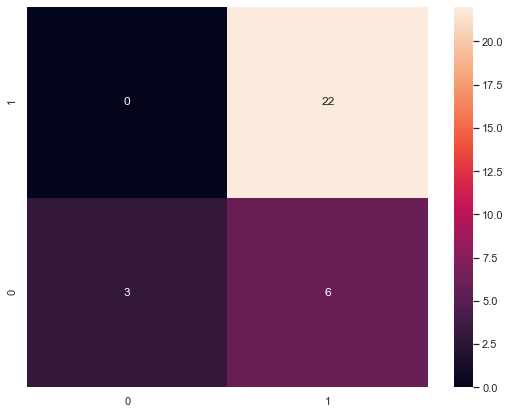

In [ ]:
# Setting up the matrix as a small graph to help in understanding the results
ax = sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt="d")
ax.set_ylim([0,2])

The Confusion Matrix True Positive value is 22 and true Negative was 3. And the False Positive
came out to be 0 and False Negative is 6

Next on is simply saving the model that I just made into a file folder which can later be used for more analysis over 
the data and using it again without retrain it. The model is always saved as an object with nay name we desire

In [ ]:
import pickle
# Save to file in the current working directory
pkl_filename = "pickle_coursework_model.pkl"

# saving my model
with open(pkl_filename, 'wb') as file:
    pickle.dump(lg_model, file)

# Load the model from file
with open(pkl_filename, 'rb') as file:
    pickle_model = pickle.load(file)

# Testing and checking the mode and results loaded from the file
score = pickle_model.score(X_test, y_test)
print("Test score of the model is: {0:.2f} %".format(100 * score))
y_hat = pickle_model.predict(X_test)


Test score of the model is: 80.65 %


In [ ]:
# Some cross-validation to analyze the data
# For that I used a simple function which validates the mean of the dataset

from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier()

from sklearn.model_selection import cross_val_score
scores = cross_val_score(classifier, X, y)
print(scores)
print(np.mean(scores))

[0.74193548 0.77419355 0.80645161 0.51612903 0.58064516]
0.6838709677419355


In [ ]:
cross_val_score(classifier, X, y, cv=5)

array([0.74193548, 0.77419355, 0.80645161, 0.51612903, 0.58064516])

After fine tuning the parameters of my code and some cross validation and peeks on the code, as per conclusion the results are still the same or extremely close with before.

Thanks to this analysis, I was able to cope the information in a useful and satisfying way for a reader to understand it.
After coding the results, I decided to search up some more methods to help me edit and make the code more efficient. After that I re-wrote my code and made sure it runs correctly. Commented the results and code so a reader can understand and most importantly made sure to make my code reproducable after numerous errors. With the help of the lectures and researching methods in the internet I was able to overcome most ups and downs in the code and make it more efficient.
The data analysis is commented step by step in the code and I think that the code itself together with the comments, explain pretty well what and how it was analyzed.